In [29]:
%matplotlib inline
import pandas as pd

In [30]:
data = pd.read_csv('./weather/minute_weather.csv')

In [31]:
data.shape

(1587257, 13)

In [32]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [33]:
# lots of rows, so let us sample down by taking every 10th row

In [34]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

In [36]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [37]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [38]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

In [39]:
# drop all the rows with empty rain_duration and rain_accumulation

In [40]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [43]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [45]:
#How many rows did we drop ?
rows_before - rows_after

46

In [46]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [47]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [48]:
select_df = sampled_df[features]

In [49]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [50]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(select_df)

In [51]:
from sklearn.cluster import KMeans

In [54]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
transformed = model.transform(X)

In [56]:
centers = model.cluster_centers_
centers

array([[ 1.19052009, -0.25512589, -1.15495633,  2.12363099, -1.0534888 ,
         2.24037915, -1.13453164],
       [-0.69789835,  0.54073134,  0.17662511, -0.58404888,  0.34601663,
        -0.59749298, -0.1122862 ],
       [ 0.13102983,  0.84310015,  1.41132838, -0.63860828,  1.67545823,
        -0.58939892, -0.7139676 ],
       [-1.18235339, -0.87333418,  0.44708593,  1.98125715,  0.53874632,
         1.94247715,  0.91124574],
       [ 1.36633069, -0.08068685, -1.20720181, -0.05027768, -1.07597516,
        -0.02997449, -0.97782544],
       [-0.83851566, -1.1997825 ,  0.37529639,  0.36413221,  0.47381357,
         0.3520958 ,  1.36173514],
       [-0.2114742 ,  0.63304075,  0.40860707,  0.73457398,  0.51676267,
         0.6726204 , -0.15068006],
       [ 0.72743718,  0.43832716,  0.28615217, -0.53479545,  0.47379692,
        -0.54099268, -0.77091048],
       [ 0.2471747 , -0.99514119,  0.6585193 , -0.54717405,  0.84932616,
        -0.52995028,  1.16029814],
       [-0.16402729,  0.8639

In [63]:
import utils

In [64]:
P = utils.pd_centers(features, centers)

# Dry Days

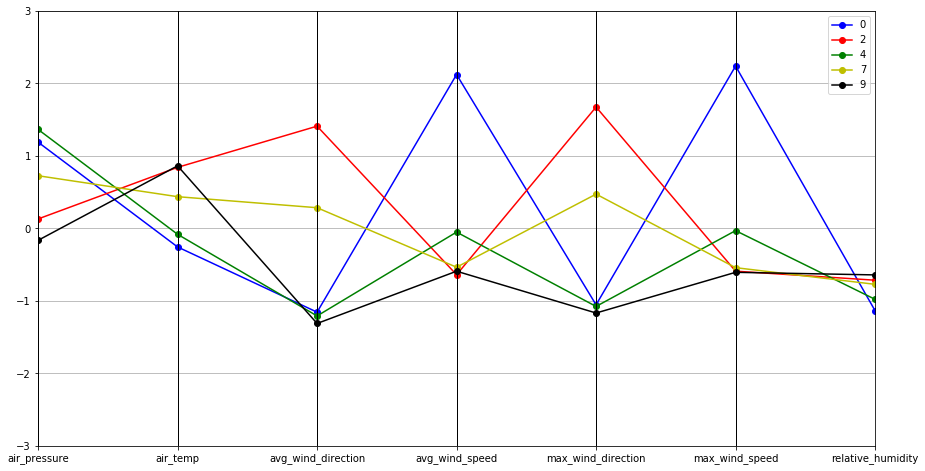

In [65]:
utils.parallel_plot(P[P['relative_humidity'] < -0.5], P)

# Warm Days

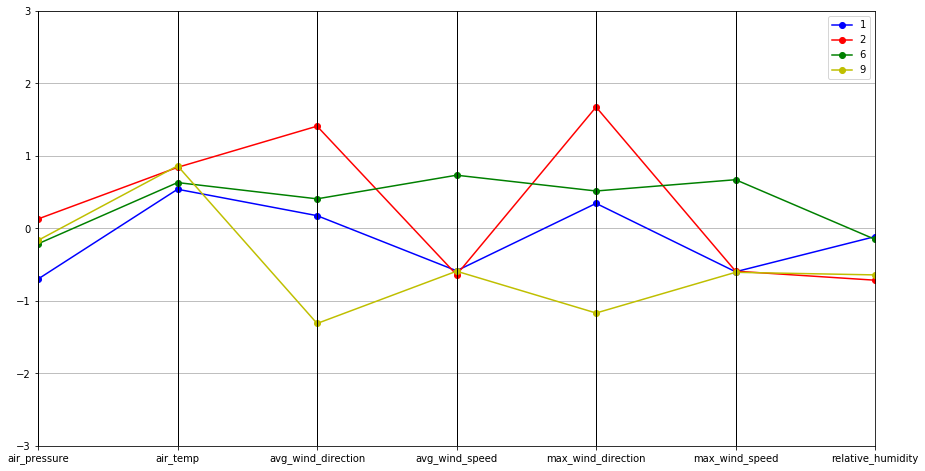

In [66]:
utils.parallel_plot(P[P['air_temp'] > 0.5], P)

# Cool Days

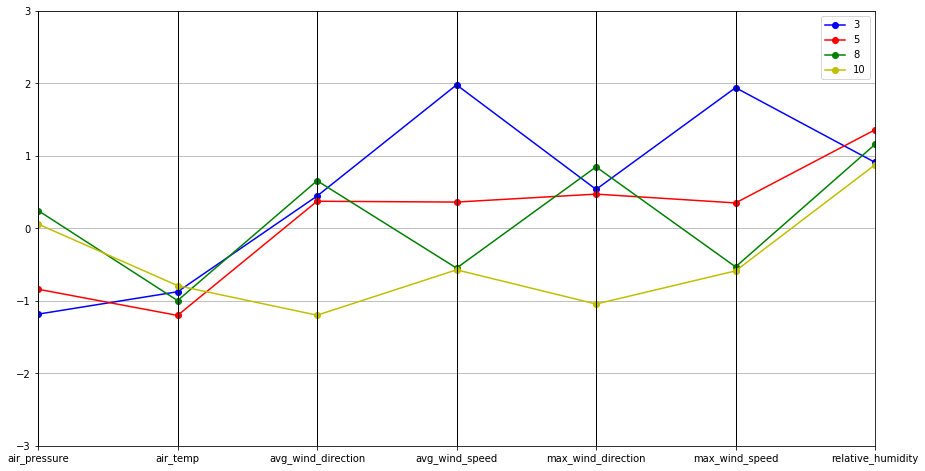

In [67]:
utils.parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)], P)